### 4.10 Part 1.25 Matural Loyal Consumer
#### 1 - importing libraries
#### 2 - Importing df
#### 3 - Analyzing  by Loyalty Flag
#### 4 - Analyzing Purshases by Income
#### 5 - Analyzing by Busiest_day
#### 6 - Analyzing number by State
#### 7 - Analyzing by n_dependants
#### 8 - Analyzing Days since prior order
#### 9 - Defining TOP products for client group

### 1 Importing libraries and df w/o PII

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
path=r'C:\Users\user\07-2023 Instacart Basket Analysis\02 Data'

### 2 Importing df

In [4]:
df=pd.read_pickle(os.path.join(path,'Prepared Data','0MLC.pkl'))

In [5]:
df.columns

Index(['user_id', 'Gender', 'STATE', 'Age', 'date_joined', 'n_dependants',
       'fam_status', 'income', 'product_id', 'product_name', 'aisle_id',
       'department_id', 'prices', 'order_id', 'eval_set', 'order_number',
       'day_of_week', 'order_hour_of_day', 'days_since_prior_order',
       'add_to_cart_order', 'reordered', 'price_range_loc', 'busiest_day',
       'busiest days', 'max_order', 'loyalty_flag', 'mean_price',
       'spender_flag', 'median_days_sinse_ord', 'frequent_flag'],
      dtype='object')

In [6]:
df.shape

(6863808, 30)

In [7]:
df[['user_id','Age', 'income','product_id', 'order_number','mean_price']] .describe()

,user_id,Age,income,product_id,order_number,mean_price
count,6.863808e+06,6.863808e+06,6.863808e+06,6.863808e+06,6.863808e+06,6.863808e+06
mean,1.031587e+05,6.099241e+01,1.165229e+05,2.551593e+04,3.223800e+01,1.029989e+01
std,5.935375e+04,1.185911e+01,4.336474e+04,1.407611e+04,2.151584e+01,3.208811e+01
min,2.700000e+01,4.100000e+01,2.905300e+04,0.000000e+00,1.000000e+00,3.012000e+00
25%,5.174600e+04,5.100000e+01,9.597500e+04,1.343100e+04,1.500000e+01,7.408529e+00
50%,1.023010e+05,6.100000e+01,1.161790e+05,2.512200e+04,3.000000e+01,7.821308e+00
75%,1.538930e+05,7.100000e+01,1.432400e+05,3.776900e+04,4.500000e+01,8.224262e+00
max,2.062080e+05,8.100000e+01,5.939010e+05,4.968800e+04,1.000000e+02,1.626190e+03


#### It's not possible use df.describe(include=[np.object]) per non numeric data because the dtype object was changed to string to avoide Memory errors

### 3 -Analyzing MLC by Frequent Flag

#### --creating the subset to avoid Memory Error

In [8]:
df1=df[['user_id','fam_status','frequent_flag']]

In [9]:
df11=df1.drop_duplicates().reset_index()

In [10]:
df11

,index,user_id,fam_status,frequent_flag
0,224,33835,married,Regular customer
1,254,75032,married,Frequent customer
2,300,516,married,Frequent customer
3,676,68032,married,Frequent customer
4,969,113616,married,Frequent customer
...,...,...,...,...
11579,6526125,205754,married,Frequent customer
11580,6526781,193697,divorced/widowed,Frequent customer
11581,6526948,180441,married,Frequent customer
11582,6527116,24301,single,Frequent customer


#### -analyzing MLC by Frequent_flag and Family Status based on customers number

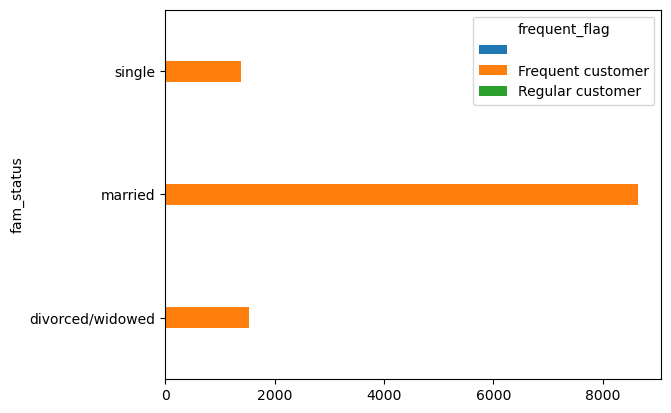

In [11]:
bar12=df11.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [12]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_LoyaltyFlag.png'))

In [13]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag    
divorced/widowed  Frequent customer    1528
                                          3
                  Regular customer        1
married           Frequent customer    8645
                                          6
                  Regular customer        4
single            Frequent customer    1389
                                          8
Name: frequent_flag, dtype: int64

### -analyzing MLC by Frequent flag and Family Status based on purchase number

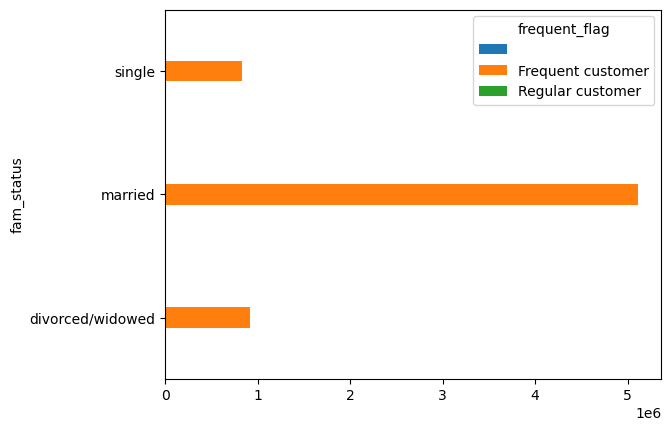

In [14]:
bar12=df1.groupby('fam_status')['frequent_flag'].value_counts().unstack().plot.barh()

In [15]:
bar12.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_LoyaltyFlagSales.png'))

In [16]:
df11.groupby('fam_status')['frequent_flag'].value_counts()

fam_status        frequent_flag    
divorced/widowed  Frequent customer    1528
                                          3
                  Regular customer        1
married           Frequent customer    8645
                                          6
                  Regular customer        4
single            Frequent customer    1389
                                          8
Name: frequent_flag, dtype: int64

### 4 -analyzing MLC purshases by their income

In [17]:
df2=df[['prices', 'income']]

In [18]:
df2['prices'].sum()

70569661.79999991

In [19]:
df22=df2.groupby('income').agg(mean_purshase=('prices','mean'))

In [20]:
df22

,mean_purshase
income,
29053,5.809153
29076,6.459859
29095,5.944949
29134,6.843655
29229,6.086957
...,...
556641,33.659304
573617,518.481931
579169,116.827422


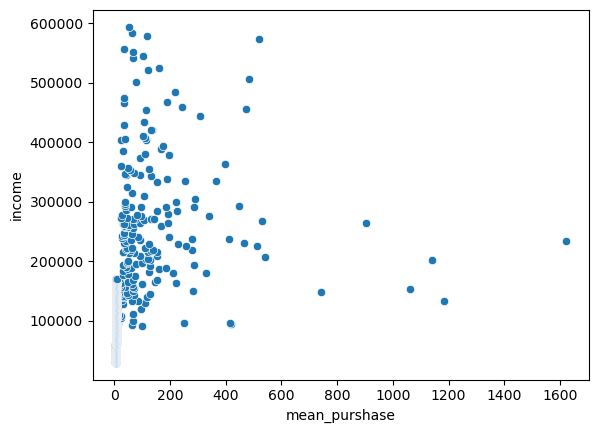

In [21]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22)

#### filter extrem big values

In [22]:
df22filtered=df22[df22['mean_purshase']<600]

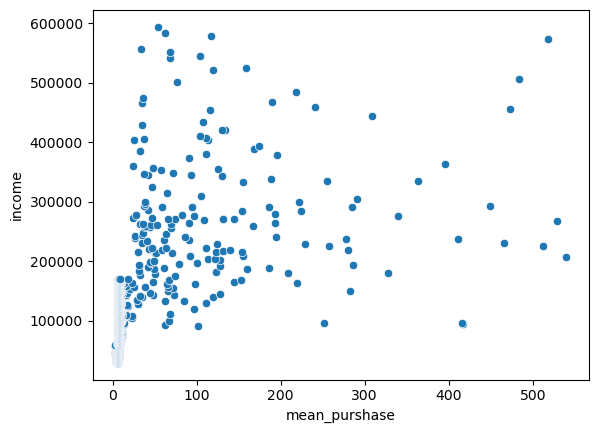

In [23]:
scat3=sns.scatterplot(x='mean_purshase', y='income', data=df22filtered)

In [24]:
scat3.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_PricesIncome.png'))

### 5 - Analyzing MLC by Busiest_day

In [25]:
df4=df[['user_id','STATE', 'busiest_day', 'day_of_week']]

In [26]:
df4

,user_id,STATE,busiest_day,day_of_week
224,33835,Nebraska,Busiest days,1
225,33835,Nebraska,Slowest days,4
226,33835,Nebraska,Busiest days,1
227,33835,Nebraska,Slowest days,4
228,33835,Nebraska,Regularly days,2
...,...,...,...,...
6463831,99254,Delaware,Busiest days,0
6463832,99254,Delaware,Regularly days,6
6463833,99254,Delaware,Busiest days,0
6463834,99254,Delaware,Busiest days,0


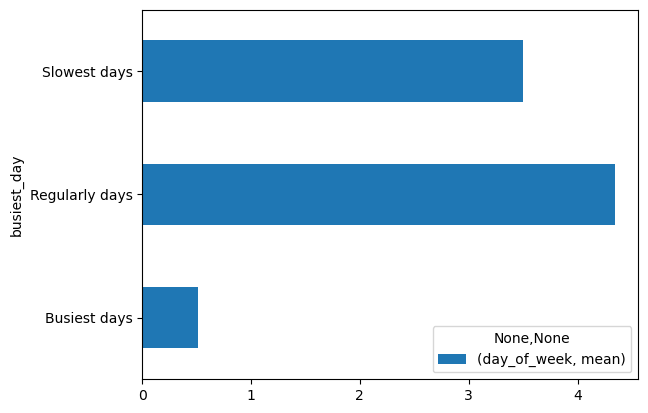

In [27]:
bar14=df4.groupby('busiest_day').agg({'day_of_week':['mean']}).plot.barh()

In [28]:
bar14.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_BusiestDayOfWeek.png'))

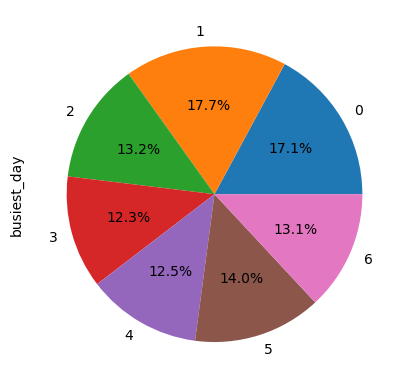

In [29]:
pie24=df4.groupby('day_of_week')['busiest_day'].count().plot(kind='pie', autopct='%0.01f%%')

In [30]:
df4.groupby('day_of_week')['busiest_day'].count()

day_of_week
0    1175305
1    1218115
2     906364
3     846258
4     857635
5     962774
6     897357
Name: busiest_day, dtype: int64

In [31]:
pie24.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_pieBusiestDayOfWeek.png'))

### -MLC prefered hour of day

In [32]:
df44=df[['order_hour_of_day','user_id']]

In [33]:
df44.groupby('order_hour_of_day')['user_id'].count()

order_hour_of_day
0      39832
1      19958
2      11851
3       8788
4      11273
5      19847
6      73891
7     232216
8     430745
9     587623
10    622120
11    581665
12    539312
13    550433
14    555092
15    537680
16    496358
17    394718
18    304481
19    243956
20    205763
21    176913
22    135760
23     83533
Name: user_id, dtype: int64

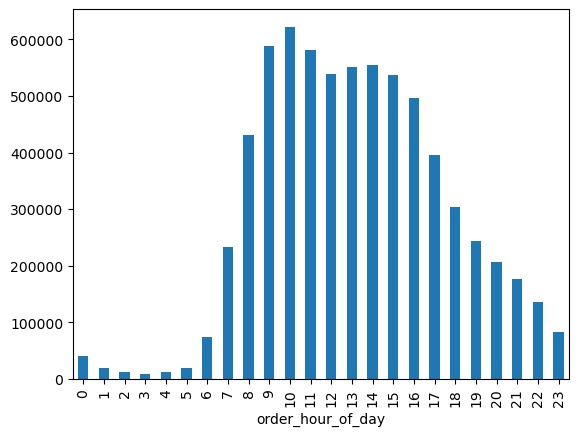

In [34]:
bar44=df44.groupby('order_hour_of_day')['user_id'].count().plot.bar()

In [35]:
bar44.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_BusiestHourOfDay.png'))

### 6 - Analyzing number of MLC by State

In [36]:
df5=df[['user_id','STATE']]

In [37]:
DF5=df5.drop_duplicates().reset_index()

In [38]:
DF5

,index,user_id,STATE
0,224,33835,Nebraska
1,254,75032,Georgia
2,300,516,Colorado
3,676,68032,West Virginia
4,969,113616,Pennsylvania
...,...,...,...
11579,6526125,205754,Maine
11580,6526781,193697,Wisconsin
11581,6526948,180441,Arizona
11582,6527116,24301,New Jersey


#### number of rows indicate total number of YLC =11594

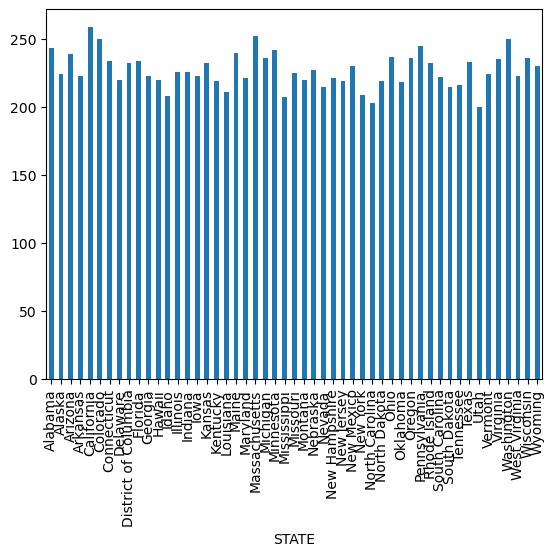

In [39]:
bar15=DF5.groupby('STATE')['user_id'].count().plot.bar()

In [40]:
DF5.groupby('STATE')['user_id'].count()

STATE
Alabama                 243
Alaska                  224
Arizona                 239
Arkansas                223
California              259
Colorado                250
Connecticut             234
Delaware                220
District of Columbia    232
Florida                 234
Georgia                 223
Hawaii                  220
Idaho                   208
Illinois                226
Indiana                 226
Iowa                    223
Kansas                  232
Kentucky                219
Louisiana               211
Maine                   240
Maryland                221
Massachusetts           252
Michigan                236
Minnesota               242
Mississippi             207
Missouri                225
Montana                 220
Nebraska                227
Nevada                  215
New Hampshire           221
New Jersey              219
New Mexico              230
New York                209
North Carolina          203
North Dakota            219
Ohio          

#### -defining 10 Top States

In [41]:
DF5.groupby('STATE')['user_id'].count().sort_values(ascending=False).head(10)

STATE
California       259
Massachusetts    252
Colorado         250
Washington       250
Pennsylvania     245
Alabama          243
Minnesota        242
Maine            240
Arizona          239
Ohio             237
Name: user_id, dtype: int64

#### -saving the plot

In [42]:
bar15.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_UsersNumberState.png'))

### 7 - Analyzing MLC by n_dependants

In [43]:
df6=df[['user_id', 'n_dependants']]

In [44]:
DF6=df6.drop_duplicates()

In [45]:
DF6.groupby(['n_dependants'])['user_id'].count()

n_dependants
0    2929
1    2902
2    2870
3    2883
Name: user_id, dtype: int64

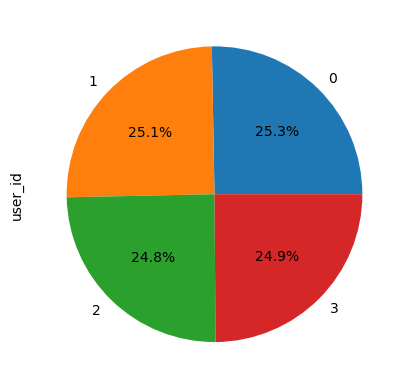

In [46]:
pie16=DF6.groupby(['n_dependants'])['user_id'].count().plot(kind='pie', autopct='%0.01f%%')

In [47]:
DF6

,user_id,n_dependants
224,33835,2
254,75032,1
300,516,2
676,68032,2
969,113616,2
...,...,...
6526125,205754,3
6526781,193697,0
6526948,180441,1
6527116,24301,0


#### saving the plot

In [48]:
pie16.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_NDependansUsers.png'))

### 8 - Analyzing MLC Days since prior order

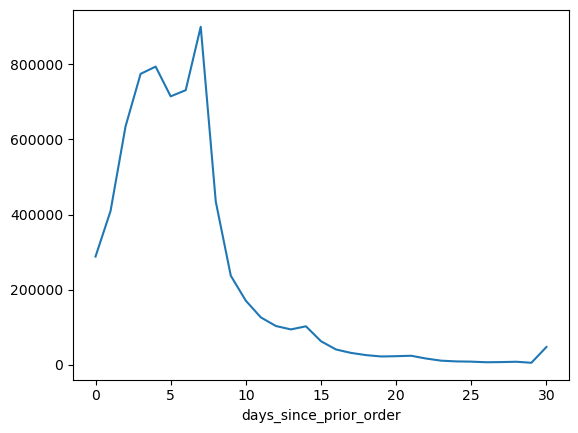

In [49]:
line17=df.groupby('days_since_prior_order')['days_since_prior_order'].count().plot(kind='line')

In [50]:
df.groupby('days_since_prior_order')['days_since_prior_order'].count()

days_since_prior_order
0     288115
1     409526
2     635309
3     774800
4     794166
5     714882
6     731289
7     900206
8     434660
9     237167
10    170493
11    126102
12    103145
13     94077
14    102378
15     62626
16     40650
17     31495
18     25614
19     22015
20     22761
21     23906
22     16442
23     10809
24      8858
25      8228
26      6605
27      7066
28      7965
29      5196
30     47257
Name: days_since_prior_order, dtype: int64

In [51]:
line17.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_DaysSincePriorOrder.png'))

### 9- Defining MLC TOP products for client group


 #### creating subset

In [52]:
df18=df[['product_name','product_id','prices']]

In [53]:
df18

,product_name,product_id,prices
224,Pistachios,10258,3.0
225,Pistachios,10258,3.0
226,Pistachios,10258,3.0
227,Pistachios,10258,3.0
228,Dry Roasted Almonds,10441,3.0
...,...,...,...
6463831,Oyster Crackers,48190,6.4
6463832,Shoestring Fries,48720,3.2
6463833,80% Lean Ground Beef,49236,20.7
6463834,80% Lean Ground Beef,49236,20.7


#### identifying the most populare products counting orders rows  and selecting 10 TOP 

In [54]:
DF18=df18.groupby('product_name')['prices'].count().sort_values( ascending=False).reset_index().head(10)

In [55]:
DF18

,product_name,prices
0,Banana,102783
1,Bag of Organic Bananas,96843
2,Organic Strawberries,69471
3,Organic Hass Avocado,55994
4,Organic Baby Spinach,53115
5,Organic Raspberries,37559
6,Organic Whole Milk,36858
7,Organic Avocado,33066
8,Limes,29991
9,Large Lemon,29078


In [56]:
DF18=DF18.rename(columns={'prices':'count_orders'})

In [57]:
DF18

,product_name,count_orders
0,Banana,102783
1,Bag of Organic Bananas,96843
2,Organic Strawberries,69471
3,Organic Hass Avocado,55994
4,Organic Baby Spinach,53115
5,Organic Raspberries,37559
6,Organic Whole Milk,36858
7,Organic Avocado,33066
8,Limes,29991
9,Large Lemon,29078


#### -creating plot

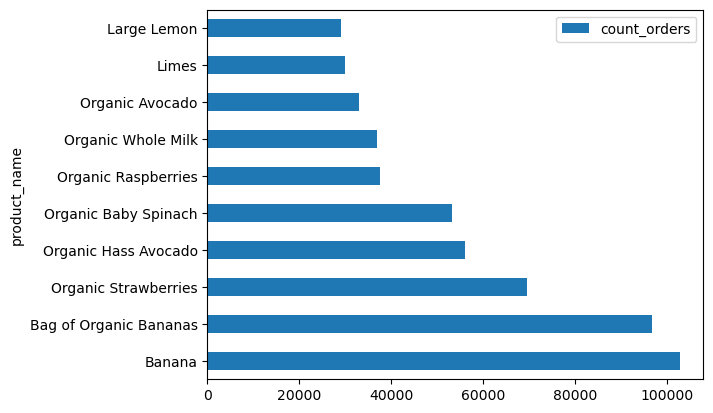

In [58]:
Bar21=DF18.plot.barh(x='product_name')

#### -saving the plot

In [59]:
Bar21.figure.savefig(os.path.join(path, 'Prepared Data', 'MLC_Products.png'))